In [1]:
import piplite
await piplite.install('pydot')
await piplite.install('python-statemachine')

In [2]:
from statemachine import StateMachine, State


class Model(object):
    
    def __init__(self, is_ok=True):
        self.is_ok = is_ok

In [3]:
class ApprovalMachine(StateMachine):
    "A workflow machine"
    requested = State("Requested", initial=True)
    accepted = State("Accepted")
    rejected = State("Rejected")
    completed = State("Completed")

    validate = requested.to(accepted, conditions="is_ok") | requested.to(rejected)
    
    vai_planeta = requested.to(completed, trigger="vai_planeta")

    @validate
    def do_validate(self, *args, **kwargs):
        pass

    @accepted.to(completed)
    def complete(self):
        pass

    @requested.to(requested)
    def update(self, **kwargs):
        pass

    @rejected.to(requested)
    def retry(self):
        pass


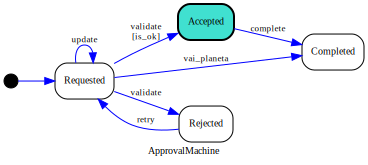

In [4]:
sm = ApprovalMachine(Model())
sm.run("validate")
sm

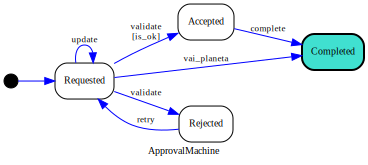

In [5]:
sm.run("complete")
sm